# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV799"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP041036, SRP027015, SRP041819, SRP061329, SRP018838, SRP021509, SRP020491, SRP050499, SRP051320, SRP052740, SRP064464, SRP055569, SRP060416, SRP014428, SRP011578, SRP057196, SRP040577, SRP063840, SRP059039, SRP029739, SRP016003, SRP030617, SRP055390, SRP008930, SRP020492, SRP007885, SRP022260, SRP058773, SRP032754, SRP019241, SRP060355, SRP043339, SRP033393, SRP045711, SRP042218, SRP059057, SRP001540, SRP028301, SRP048577, SRP042161, SRP007525, SRP048660, SRP029889, SRP001563, SRP007461, SRP043078, SRP056696, SRP055009, SRP047476, SRP039694, SRP061241, SRP055675, SRP050551, SRP030041, SRP012461, SRP048820, SRP057205, SRP066834, SRP013450, SRP014688, SRP012557, SRP018853, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (60 != 62)
  warnings.warn(


In [18]:
lv_data.shape

(6504, 98)

In [19]:
lv_data.head()

tissue source cell line treatment timepoint  \
project   run                                                      
SRP041036 SRR1223541   bone marrow      JJN3   Control       4hr   
          SRR1223542   bone marrow      JJN3   LBH.589       4hr   
          SRR1223543   bone marrow      JJN3     5.AZA       4hr   
          SRR1223544   bone marrow      JJN3     Combo       4hr   
          SRR1223545   bone marrow      JJN3       NMP       4hr   

                     cycloheximide time point sample type cell type phenotype  \
project   run                                                                   
SRP041036 SRR1223541           NaN        NaN         NaN       NaN       NaN   
          SRR1223542           NaN        NaN         NaN       NaN       NaN   
          SRR1223543           NaN        NaN         NaN       NaN       NaN   
          SRR1223544           NaN        NaN         NaN       NaN       NaN   
          SRR1223545           NaN        NaN         NaN       NaN       NaN   

                     passage  ... ssea4 tra160 Stage antibody vendor/catalog#  \
project   run                 ...                                               
SRP041036 SRR1223541     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223542     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223543     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223544     NaN  ...   NaN    NaN   NaN                      NaN   
          SRR1223545     NaN  ...   NaN    NaN   NaN                      NaN   

                     directional rnaseq experiment individual assay status  \
project   run                                                                
SRP041036 SRR1223541                NaN        NaN        NaN   NaN    NaN   
          SRR1223542                NaN        NaN        NaN   NaN    NaN   
          SRR1223543                NaN        NaN        NaN   NaN    NaN   
          SRR1223544                NaN        NaN        NaN   NaN    NaN   
          SRR1223545                NaN        NaN        NaN   NaN    NaN   

                         LV799  
project   run                   
SRP041036 SRR1223541  0.301096  
          SRR1223542  0.263358  
          SRR1223543  0.235380  
          SRR1223544  0.236506  
          SRR1223545  0.208384  

[5 rows x 98 columns]

# LV cell types analysis

## Get top attributes

In [35]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

tissue source         0.697671
timepoint             0.697671
treatment             0.144082
cell line             0.089638
cycloheximide         0.068640
sample type           0.038576
passage               0.030872
time point            0.017055
phenotype             0.014467
overexpression        0.010219
labexpid              0.008908
condition             0.005233
assigned cell type    0.004164
ercc_dilution         0.004164
ercc_mix              0.004164
qc pass               0.004164
cell count            0.004164
individual            0.003890
assay                 0.003890
genotype/variation    0.003701
dtype: float64

In [36]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type    0.002308
tissue       0.001219
dtype: float64

In [37]:
_tmp = lv_data.loc[
    :,
    [
        "tissue source",
        "cell line",
        "cell type",
        "tissue",
        LV_NAME,
    ],
]

In [38]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [39]:
_tmp_seq[2]

tissue source cell line            cell type tissue  \
project   run                                                              
SRP061329 SRR2107337           NaN    MOLP-8                  NaN    NaN   
          SRR2107336           NaN    MOLP-8                  NaN    NaN   
          SRR2107335           NaN    MOLP-8                  NaN    NaN   
SRP041036 SRR1223572   bone marrow      JJN3                  NaN    NaN   
SRP027015 SRR931822            NaN       NaN                  NaN    NaN   
SRP041036 SRR1223594   bone marrow      JJN3                  NaN    NaN   
          SRR1223573   bone marrow      JJN3                  NaN    NaN   
          SRR1223551   bone marrow      JJN3                  NaN    NaN   
          SRR1223591   bone marrow      JJN3                  NaN    NaN   
          SRR1223575   bone marrow      JJN3                  NaN    NaN   
SRP020491 SRR805752            NaN       NaN  circulating B cells    NaN   
SRP041036 SRR1223555   bone marrow      JJN3                  NaN    NaN   
          SRR1223561   bone marrow      JJN3                  NaN    NaN   
          SRR1223595   bone marrow      JJN3                  NaN    NaN   
          SRR1223541   bone marrow      JJN3                  NaN    NaN   
SRP027015 SRR931815            NaN       NaN                  NaN    NaN   
SRP050499 SRR2013650           NaN       NaN                  NaN    NaN   
SRP018838 SRR764786            NaN   GM12878                  NaN    NaN   
SRP051320 SRR1723088           NaN      LP-1                  NaN    NaN   
SRP041036 SRR1223553   bone marrow      JJN3                  NaN    NaN   
SRP051320 SRR1723091           NaN      LP-1                  NaN    NaN   
SRP041036 SRR1223593   bone marrow      JJN3                  NaN    NaN   
SRP051320 SRR1723092           NaN      LP-1                  NaN    NaN   
SRP052740 SRR1768898           NaN       NaN             melanoma    NaN   
SRP051320 SRR1723086           NaN      LP-1                  NaN    NaN   

                         LV799  
project   run                   
SRP061329 SRR2107337  0.360735  
          SRR2107336  0.351320  
          SRR2107335  0.349604  
SRP041036 SRR1223572  0.348948  
SRP027015 SRR931822   0.347864  
SRP041036 SRR1223594  0.343060  
          SRR1223573  0.331773  
          SRR1223551  0.327182  
          SRR1223591  0.318520  
          SRR1223575  0.317625  
SRP020491 SRR805752   0.314099  
SRP041036 SRR1223555  0.306255  
          SRR1223561  0.303568  
          SRR1223595  0.302896  
          SRR1223541  0.301096  
SRP027015 SRR931815   0.298945  
SRP050499 SRR2013650  0.295602  
SRP018838 SRR764786   0.290846  
SRP051320 SRR1723088  0.288261  
SRP041036 SRR1223553  0.287861  
SRP051320 SRR1723091  0.287646  
SRP041036 SRR1223593  0.287473  
SRP051320 SRR1723092  0.287081  
SRP052740 SRR1768898  0.286241  
SRP051320 SRR1723086  0.285515

In [40]:
# what is there in these projects?
lv_data.loc[["SRP027015"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

cycloheximide      time point  \
project   run                                                  
SRP027015 SRR931814                     none  0h (untreated)   
          SRR931816                     none            1.5h   
          SRR931818                     none              3h   
          SRR931820                     none              6h   
          SRR931822                     none              9h   
          SRR931815  0.1 mg/mL cycloheximide  0h (untreated)   
          SRR931819  0.1 mg/mL cycloheximide              3h   
          SRR931824                     none             12h   
          SRR931821  0.1 mg/mL cycloheximide              6h   
          SRR931817  0.1 mg/mL cycloheximide            1.5h   

                            sample type     LV799  
project   run                                      
SRP027015 SRR931814        poly(A) mRNA  0.799245  
          SRR931816        poly(A) mRNA  0.740098  
          SRR931818        poly(A) mRNA  0.650010  
          SRR931820        poly(A) mRNA  0.410846  
          SRR931822        poly(A) mRNA  0.347864  
          SRR931815  ribosome footprint  0.298945  
          SRR931819  ribosome footprint  0.246081  
          SRR931824        poly(A) mRNA  0.214638  
          SRR931821  ribosome footprint  0.177244  
          SRR931817  ribosome footprint  0.174359

In [41]:
SELECTED_ATTRIBUTE = "tissue source"

In [42]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["cell type", "cell line"]

## Get plot data

In [113]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [114]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [115]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [116]:
plot_data.head(20)

tissue source     LV799
project   run                                   
SRP041036 SRR1223586  peripheral blood  2.395650
          SRR1223576  peripheral blood  2.364392
          SRR1223566  peripheral blood  2.310441
          SRR1223596  peripheral blood  2.268940
          SRR1223587  peripheral blood  2.178015
          SRR1223588  peripheral blood  2.169669
          SRR1223578  peripheral blood  2.162259
          SRR1223568  peripheral blood  2.157781
          SRR1223546  peripheral blood  2.148394
          SRR1223598  peripheral blood  2.118455
          SRR1223590  peripheral blood  2.077341
          SRR1223570  peripheral blood  2.060424
          SRR1223556  peripheral blood  2.045684
          SRR1223558  peripheral blood  2.013075
          SRR1223548  peripheral blood  1.941864
          SRR1223567  peripheral blood  1.921841
          SRR1223589  peripheral blood  1.921836
          SRR1223550  peripheral blood  1.789092
          SRR1223547  peripheral blood  1.777438
          SRR1223597  peripheral blood  1.728821

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [117]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            # "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            # "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [118]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [119]:
_srp_code = "SRP027015"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood (MM.1S)",
    # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [120]:
_srp_code = "SRP061329"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Peripheral blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [121]:
_srp_code = "SRP018838"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: "Blood"
    + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [122]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [123]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [124]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [125]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [126]:
len(attr_order)

15

In [127]:
attr_order[:5]

['Peripheral blood',
 'Peripheral blood (MM.1S)',
 'Multiple myeloma',
 'Peripheral blood (MOLP-8)',
 'Blood (GM12878)']

## Plot

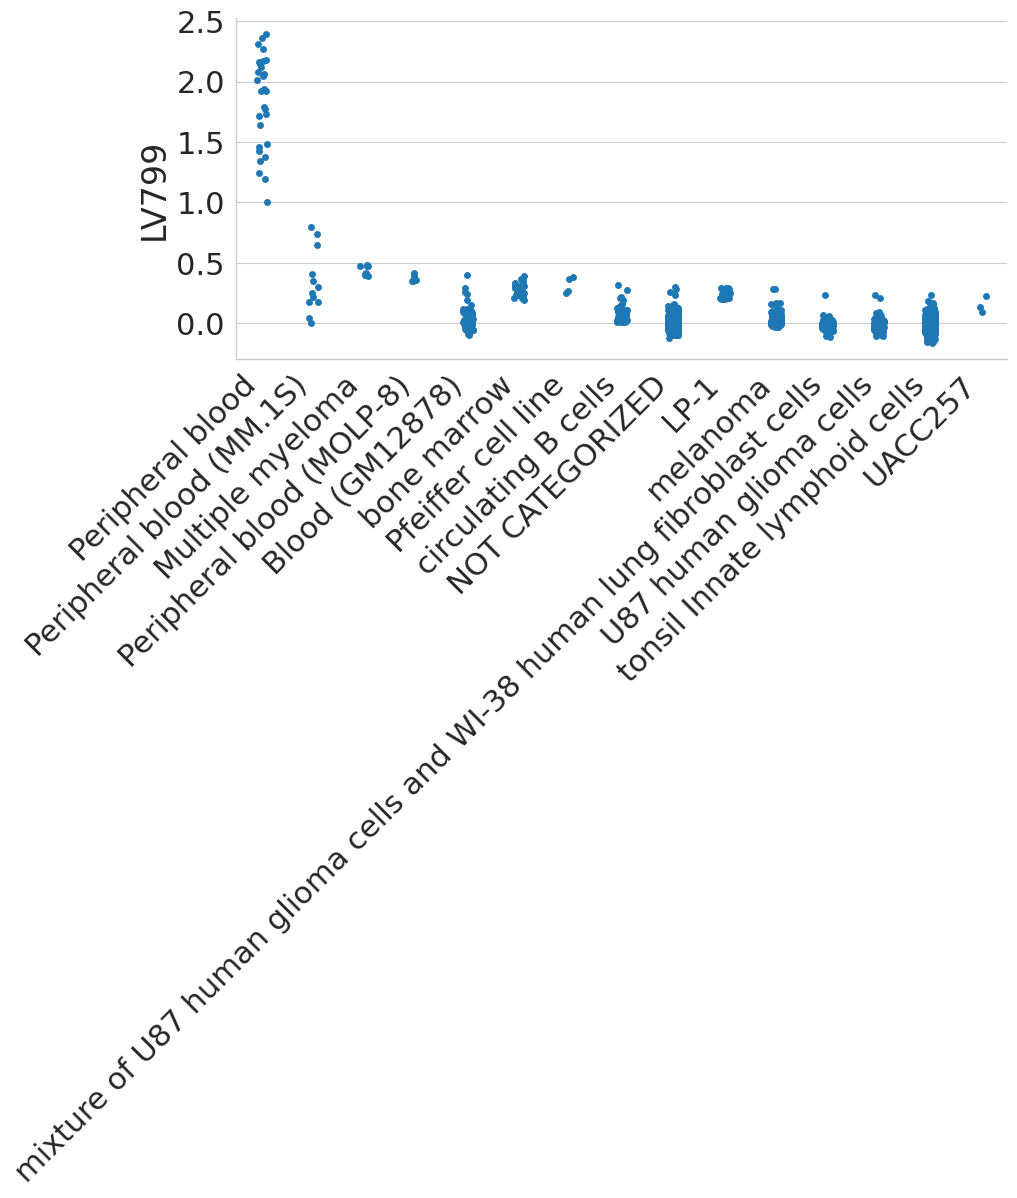

In [128]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [77]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [111]:
with pd.option_context(
    "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
):
    _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("GM1287")].sort_values(LV_NAME, ascending=False)
    display(_tmp.head(20))

tissue source     LV799
project   run                               
SRP018838 SRR764804        GM12878  0.395907
          SRR764786        GM12878  0.290846
          SRR764808        GM12878  0.257962
          SRR764793        GM12878  0.239863
          SRR764802        GM12878  0.188147
          SRR764787        GM12878  0.147507
          SRR764792        GM12878  0.120662
          SRR764791        GM12878  0.118789
          SRR764794        GM12878  0.104662
          SRR764797        GM12878  0.103519
          SRR764777        GM12878  0.095218
          SRR764776        GM12878  0.092368
          SRR764778        GM12878  0.086545
          SRR1066636       GM12878  0.086400
          SRR764788        GM12878  0.079235
          SRR764803        GM12878  0.074906
          SRR764779        GM12878  0.073884
          SRR764780        GM12878  0.061458
          SRR1066634       GM12878  0.057079
          SRR764815        GM12878  0.055751

In [112]:
# what is there in these projects?
_tmp = lv_data.loc[["SRP018838"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
)

display(_tmp.head(60))

cell line labexpid     LV799
project   run                                    
SRP018838 SRR764804    GM12878    13282  0.395907
          SRR764786    GM12878    12535  0.290846
          SRR764808    GM12878    13286  0.257962
          SRR764793    GM12878    12542  0.239863
          SRR764802    GM12878    13278  0.188147
          SRR764787    GM12878    12536  0.147507
          SRR764792    GM12878    12541  0.120662
          SRR764791    GM12878    12540  0.118789
          SRR764794    GM12878    12543  0.104662
          SRR764797    GM12878    12820  0.103519
          SRR764777    GM12878    12516  0.095218
          SRR764776    GM12878    12515  0.092368
          SRR764778    GM12878    12517  0.086545
          SRR1066636   GM12878    13294  0.086400
          SRR764788    GM12878    12537  0.079235
          SRR764803    GM12878    13279  0.074906
          SRR764779    GM12878    12518  0.073884
          SRR764780    GM12878    12519  0.061458
          SRR1066634   GM12878    13292  0.057079
          SRR764815    GM12878    13301  0.055751
          SRR764785    GM12878    12534  0.050131
          SRR764817    GM12878    13303  0.041932
          SRR1066626   GM12878    13268  0.037586
          SRR764782    GM12878    12522  0.036733
          SRR1066641   GM12878    13299  0.030569
          SRR764789    GM12878    12538  0.029425
          SRR1066639   GM12878    13297  0.025926
          SRR764781    GM12878    12520  0.025860
          SRR764816    GM12878    13302  0.024972
          SRR764805    GM12878    13283  0.012215
          SRR764814    GM12878    13300  0.010405
          SRR1066632   GM12878    13280  0.006034
          SRR764783    GM12878    12523 -0.000977
          SRR1066623   GM12878    12822 -0.004279
          SRR764795    GM12878    12818 -0.006036
          SRR1066631   GM12878    13273 -0.007097
          SRR764811    GM12878    13289 -0.007775
          SRR764799    GM12878    13275 -0.009189
          SRR764800    GM12878    13276 -0.011259
          SRR764784    GM12878    12524 -0.016435
          SRR1066625   GM12878    12824 -0.019685
          SRR1066629   GM12878    13271 -0.020037
          SRR1066635   GM12878    13293 -0.020291
          SRR764801    GM12878    13277 -0.025099
          SRR764798    GM12878    13274 -0.031152
          SRR764790    GM12878    12539 -0.039895
          SRR1066624   GM12878    12823 -0.042836
          SRR764796    GM12878    12819 -0.043434
          SRR764806    GM12878    13284 -0.043849
          SRR1066633   GM12878    13281 -0.044523
          SRR1066637   GM12878    13295 -0.045269
          SRR1066622   GM12878    12821 -0.048962
          SRR1066638   GM12878    13296 -0.049950
          SRR1066640   GM12878    13298 -0.050033
          SRR1066628   GM12878    13270 -0.051936
          SRR764809    GM12878    13287 -0.053169
          SRR764813    GM12878    13291 -0.056821
          SRR1066630   GM12878    13272 -0.060112
          SRR764807    GM12878    13285 -0.061933
          SRR1066627   GM12878    13269 -0.063841

In [62]:
_tmp.iloc[0]["sample type"]

'poly(A) mRNA'

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )